<a href="https://colab.research.google.com/github/Alexgit999/AED_UE/blob/main/AED_actividad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACTIVIDAD 2: Aplicación del análisis exploratorio de datos a diversas variables

# 1. INTRODUCCIÓN
a. Descripción de la base de datos seleccionada: contexto, origen y propósito.

https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance

Al leerse la descripción en la página de Kaggle se entiende que, al igual que en mi primer ejercicio, se trata de datos sobre el rendimiento académico de un conjunto de estudiantes, y complementa muy bien los datos del anterior estudio (el primer ejercicio de la asignatura), aunque en realidad se trata de datos no reales. Los datos de una encuesta real podrían sugerir hipótesis o nuevas preguntas.

Según Kaggle:

> *Este conjunto de datos simulados explora cómo los hábitos de vida afectan el rendimiento académico de los estudiantes. Con 1000 registros sintéticos de estudiantes y más de 15 características, como horas de estudio, patrones de sueño, uso de redes sociales, calidad de la dieta, salud mental y calificaciones de exámenes finales, es perfecto para proyectos de aprendizaje automático, análisis de regresión, agrupamiento y visualización de datos. Creado con patrones realistas para la práctica educativa.*


b. Descripción general de las variables incluidas en la base de datos.

El dataset consta de una única tabla de 16 columnas. Las variables se dividen en 6 de tipo decimal, 5 de tipo string, 3 de tipo entero y 2 de otro tipo.

> student_id	-> object;
age ->	int64;
gender ->	object;
study_hours_per_day ->	float64;
social_media_hours ->	float64;
netflix_hours ->	float64;
part_time_job ->	object;
attendance_percentage ->	float64;
sleep_hours ->	float64;
diet_quality ->	object;
exercise_frequency ->	int64;
parental_education_level ->	object;
internet_quality ->	object;
mental_health_rating ->	int64;
extracurricular_participation ->	object;
exam_score ->	float64




# Cargamos el dataset directamente desde Kaggle:

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import scipy.stats as stats
%matplotlib inline

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexcurso","key":"ca1b3b391ddb16774b7e391c52e94037"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d jayaantanaath/student-habits-vs-academic-performance

Dataset URL: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance
License(s): apache-2.0


In [7]:
!unzip student-habits-vs-academic-performance.zip

Archive:  student-habits-vs-academic-performance.zip
  inflating: student_habits_performance.csv  


In [8]:
df = pd.read_csv("student_habits_performance.csv")


# Sacamos una muestra del dataset

In [9]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [13]:
df.dtypes

,0
student_id,object
age,int64
gender,object
study_hours_per_day,float64
social_media_hours,float64
netflix_hours,float64
part_time_job,object
attendance_percentage,float64
sleep_hours,float64
diet_quality,object


# 2. ANÁLISIS DESCRIPTIVO DE VARIABLES CUANTITATIVAS

# a. Selección entre 2-4 variables cuantitativas.

In [10]:
variables_cuantitativas = df.select_dtypes(include=['number']).columns
print("Variables cuantitativas:", variables_cuantitativas)

Variables cuantitativas: Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')


# b. Cálculo y descripción de las medidas de tendencia central: media, mediana y moda.

In [21]:
tendencia_central = {}

for var in variables_cuantitativas:
    media = round(df[var].mean(), 2) # Redondeo a 2 decimales
    mediana = df[var].median()
    moda = df[var].mode()[0]
    tendencia_central[var] = {'Media': media, 'Mediana': mediana, 'Moda': moda}

# Convertir el diccionario en un DataFrame para una mejor visualización
medidas_df = pd.DataFrame(tendencia_central).transpose()
print(medidas_df)

                       Media  Mediana   Moda
age                    20.50     20.0   20.0
study_hours_per_day     3.55      3.5    3.5
social_media_hours      2.51      2.5    3.1
netflix_hours           1.82      1.8    0.0
attendance_percentage  84.13     84.4  100.0
sleep_hours             6.47      6.5    6.5
exercise_frequency      3.04      3.0    3.0
mental_health_rating    5.44      5.0    4.0
exam_score             69.60     70.5  100.0


# c. Cálculo y descripción de las medidas de dispersión: rango, varianza,desviación estándar, percentiles.

In [19]:
medidas_dispersión = {}

for var in variables_cuantitativas:
    # Calcular las medidas de dispersión
    rango = df[var].max() - df[var].min()  # Rango
    varianza = round(df[var].var(), 2)  # Varianza
    desviacion_estandar = round(df[var].std(), 2)  # Desviación estándar
    percentiles = {f'{p}°': np.percentile(df[var], p) for p in [25, 50, 75]}  # Percentiles 25, 50, 75

    medidas_dispersión[var] = {
        'Rango': rango,
        'Varianza': varianza,
        'Desviación Estándar': desviacion_estandar,
        'Percentiles': percentiles
    }

# Convertir a DataFrame para visualizar mejor
medidas_disp_df = pd.DataFrame(medidas_dispersión).transpose()

# Mostrar los resultados
print(medidas_disp_df)

                      Rango Varianza Desviación Estándar  \
age                       7     5.33                2.31   
study_hours_per_day     8.3     2.16                1.47   
social_media_hours      7.2     1.37                1.17   
netflix_hours           5.4     1.16                1.08   
attendance_percentage  44.0    88.35                 9.4   
sleep_hours             6.8      1.5                1.23   
exercise_frequency        6      4.1                2.03   
mental_health_rating      9     8.11                2.85   
exam_score             81.6   285.22               16.89   

                                                       Percentiles  
age                       {'25°': 18.75, '50°': 20.0, '75°': 23.0}  
study_hours_per_day           {'25°': 2.6, '50°': 3.5, '75°': 4.5}  
social_media_hours            {'25°': 1.7, '50°': 2.5, '75°': 3.3}  
netflix_hours               {'25°': 1.0, '50°': 1.8, '75°': 2.525}  
attendance_percentage    {'25°': 78.0, '50°': 84.4, '7

# d. Visualización de los datos: histogramas, boxplots y gráficos de densidad.

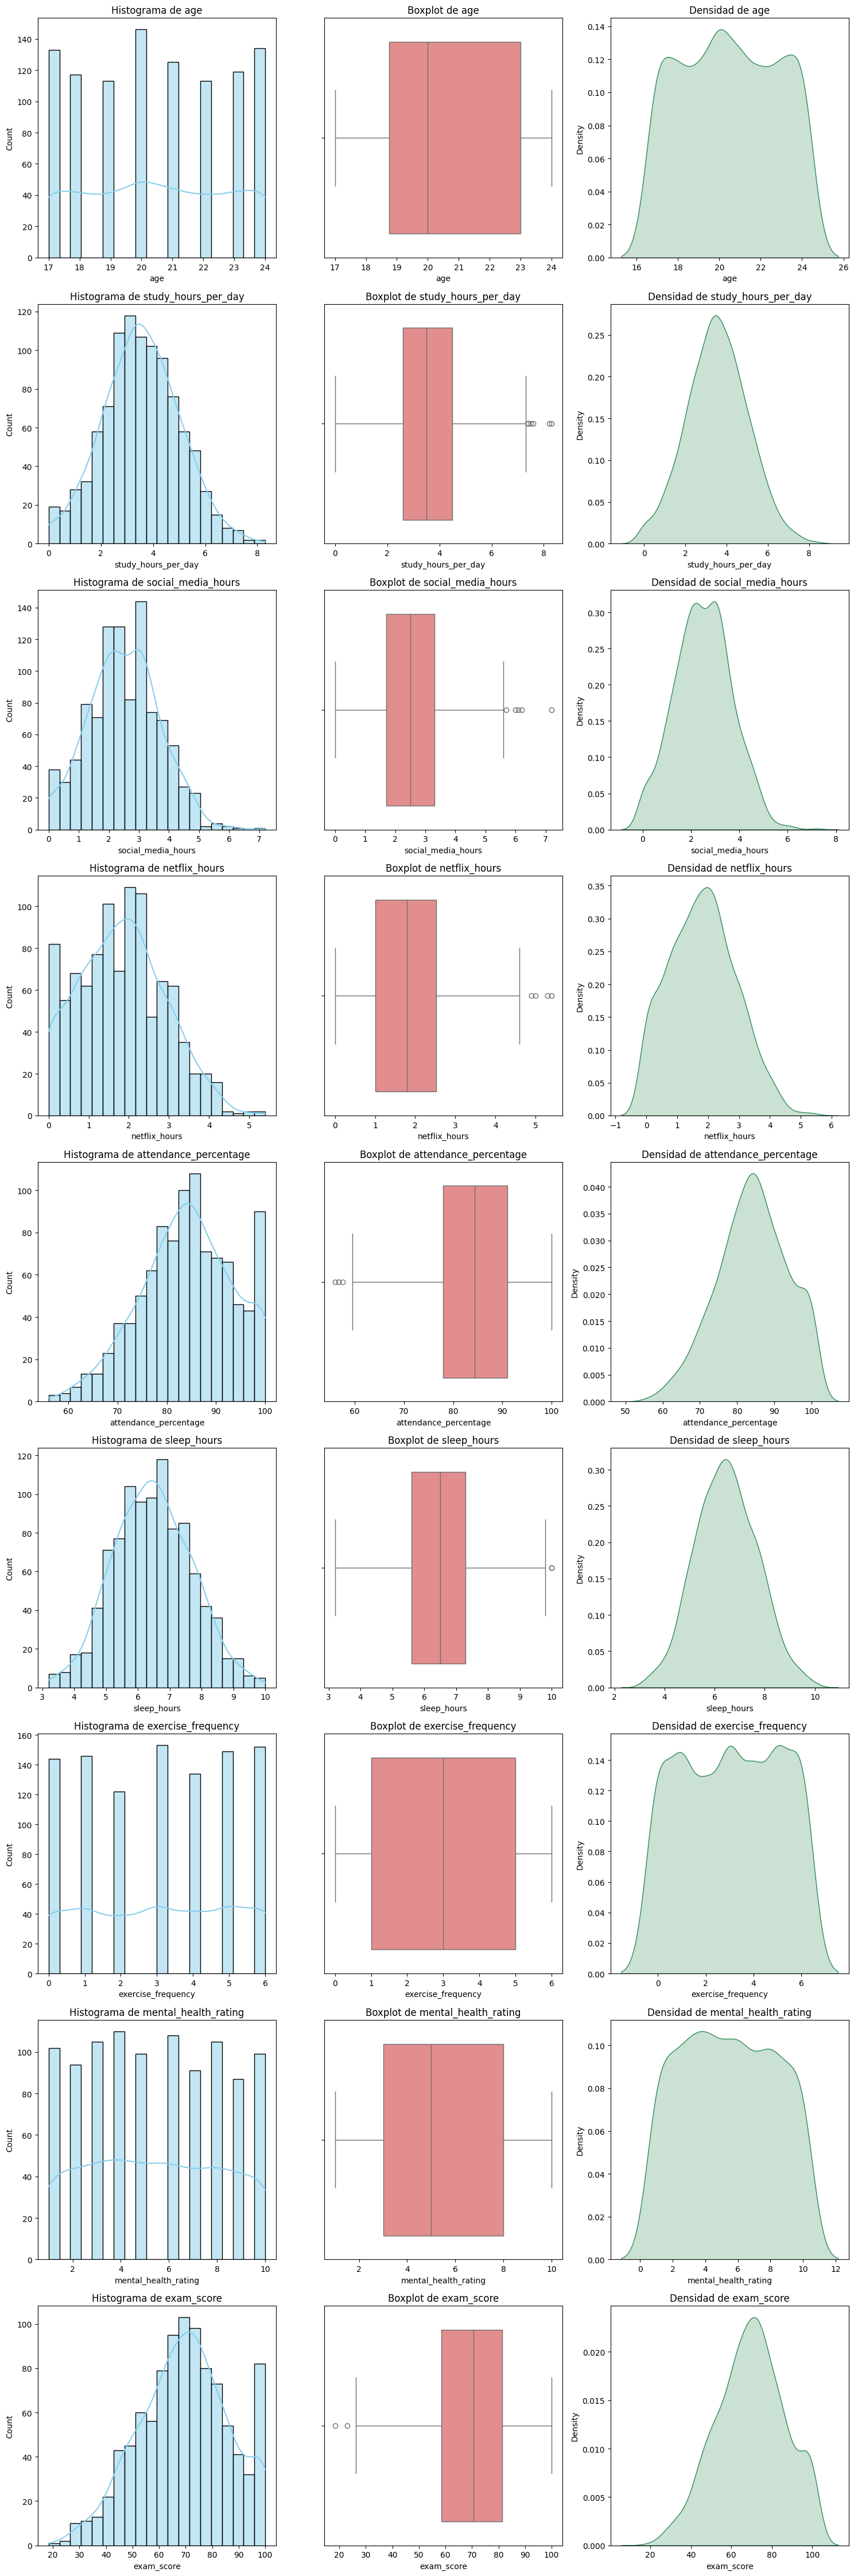

In [17]:
#sns.set_style("whitegrid")

# Crear subplots para cada tipo de gráfico
fig, axes = plt.subplots(nrows=len(variables_cuantitativas), ncols=3, figsize=(15, 5 * len(variables_cuantitativas)))

for i, var in enumerate(variables_cuantitativas):
    # Histograma fila 1
    sns.histplot(df[var], bins=20, kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"Histograma de {var}")

    # Boxplot fila 2
    sns.boxplot(x=df[var], ax=axes[i, 1], color="lightcoral")
    axes[i, 1].set_title(f"Boxplot de {var}")

    # Gráfico de Densidad fila 3
    sns.kdeplot(df[var], fill=True, ax=axes[i, 2], color="seagreen")
    axes[i, 2].set_title(f"Densidad de {var}")

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show();

# e. Verificación de la condición de normalidad mediante la prueba de Shapiro-Wilk y la prueba de Kolmogorov-Smirnov.

In [24]:
# import scipy.stats as stats

normalidad = {}

for var in variables_cuantitativas:
    # Prueba de Shapiro-Wilk: evalúa si una muestra de datos proviene de una distribución normal
    shapiro_stat, shapiro_p = stats.shapiro(df[var].dropna())
    # shapiro_test = stats.shapiro(df[var]) # Otra forma


    # Prueba de Kolmogorov-Smirnov: compara la distribución de una muestra de datos con una distribución teórica
    ks_stat, ks_p = stats.kstest(df[var].dropna(), 'norm', args=(df[var].mean(), df[var].std())) # Comparamos con la distribucion normal

    # Guardar resultados
    normalidad[var] = {
        "Shapiro-Wilk p-valor": round(shapiro_p, 4),
        "Kolmogorov-Smirnov p-valor": round(ks_p, 4),
        "Normalidad (p > 0.05)": shapiro_p > 0.05 and ks_p > 0.05 # Conclusión final para cada variable
    }

# Diccionario a DataFrame
resultados_df = pd.DataFrame(normalidad).transpose()

print(resultados_df)
print("\nClaramente, social_media_hours y sleep_hours siguen una distribución normal, \nalgo que ya era apreciable en los gráficos con forma de campana de Gauss.\n")

                      Shapiro-Wilk p-valor Kolmogorov-Smirnov p-valor  \
age                                    0.0                        0.0   
study_hours_per_day                 0.1065                     0.6136   
social_media_hours                  0.0007                     0.2603   
netflix_hours                          0.0                     0.0322   
attendance_percentage                  0.0                     0.0298   
sleep_hours                         0.0888                     0.3381   
exercise_frequency                     0.0                        0.0   
mental_health_rating                   0.0                        0.0   
exam_score                             0.0                     0.1475   

                      Normalidad (p > 0.05)  
age                                   False  
study_hours_per_day                    True  
social_media_hours                    False  
netflix_hours                         False  
attendance_percentage                 F

# f. Interpretación de los resultados obtenidos.

# 3. ANÁLISIS DESCRIPTIVO DE VARIABLES CATEGÓRICAS

# a. Selección entre 2-4 variables categóricas.

In [11]:
# Filtrar columnas categóricas que no sean binarias ni numéricas
categorical_vars = [
    col for col in df.select_dtypes(include=['object', 'category']).columns
    if df[col].nunique() > 2 and not df[col].str.contains('%').any()
]

print("VARIABLES CATEGÓRICAS:\n")

# Mostrar solo el nombre de las columnas
for col in categorical_vars:
    print(col)




VARIABLES CATEGÓRICAS:

student_id
gender
diet_quality
parental_education_level
internet_quality


4. ANÁLISIS DESCRIPTIVO DE VARIABLES BINARIAS

In [12]:
binary_vars = [col for col in df.select_dtypes(include=['object', 'category']).columns if df[col].nunique() == 2] # solo binarias

print("Variables binarias:", binary_vars, "\n")

for col in binary_vars:
    print(f"{col}: {df[col].unique()}")



Variables binarias: ['part_time_job', 'extracurricular_participation'] 

part_time_job: ['No' 'Yes']
extracurricular_participation: ['Yes' 'No']
